# `DSCI 100 - Project Planning Stage (Individual)`  
*Mannat Sidhu*   
*Group 20*  
*November 11, 2025*

In [1]:
# run this before continuing
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## **`Introduction`**

Online video games can be challenging to manage because they need surveillance of player activity and appropriate resources. A research group at UBC, led by Frank Wood, is collecting data from a Minecraft server to analyze player behaviour. The broad and specific questions answered by this project are:

**Broad Question:**  
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question:**  
Can hours played and age predict whether the player is subscribed to a game-related newsletter?

***Data Description***  
There are two datasets related to this research:  
- Players: contains player demographic and experience information
- Sessions: contains time-related information about player sessions

In [2]:
# Reading the two datasets
download.file(url = "https://raw.githubusercontent.com/mannats74/DSCIProjectIndividual/refs/heads/main/players.csv", destfile = "players.csv")
download.file(url = "https://raw.githubusercontent.com/mannats74/DSCIProjectIndividual/refs/heads/main/sessions.csv", destfile = "sessions.csv")
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
# Summary Statistics
summary(players)
summary(sessions)
unique(players$experience)
unique(players$gender)
mean(players$Age, na.rm = TRUE)
mean(players$played_hours)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

[1] 21.13918

[1] 5.845918

However, this project will focus on the `players` dataset because all relevant variables are present there.
In this dataset, there are **196 observations** (196 rows) and each observation contains **7 variables** (7 columns):
- `experience` (character): categorical variable with 5 categories describing the experience of the player
   - Pro, Veteran, Amateur, Regular, Beginner
- `subscribe` (logical): true indicates the player is subscribed to a game-related newsletter, and false means they are not
- `hashedEmail` (character): hashed email of the player
- `played_hours` (double): numerical variable indiciating how many hours the player has played MineCraft
- `name` (character): first name of the player
- `gender` (character): gender of the player
  - Male, Female, Non-binary, Agender, Two-Spirited, Other, and Prefer not to say
- `Age` (double): age of the player

***Player mean values***
| Variable Name | Mean |
|---|---|
| Age | 21.14 years |
| played_hours | 5.85 hours |

The second dataset is `sessions` and will only be analyzed but not used to answer the broad and specific questions. In this dataset, there are **1535 observations** (1535 rows) and **5 variables** (5 columns):
- `hashedEmail` (character): hashed email of the player
- `start_time` (character): date and time at the beginning of the session in character form
- `end_time` (character): date and time at the end of the session in character form
- `original_start_time` (double): time at the beginning of the session in numeric form
- `original_end_time` (double): time at the end of the session in numeric form

***Issues with the data***  
- There are some missing `age` values in the `players` dataset
- The `sessions` dataset is untidy
- There are some missing values in `original_end_time` in `sessions`
- One potential issue is the outliers with significantly different/ higher values than the majority of the observations

***How the data was collected***
- Through recording each player's gameplay, speech, and keys pressed in PLAICraft Minecraft

In [11]:
# Tidying data by removing NA Age observations
tidy_players <- filter(players, !is.na(Age))
tidy_players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


## Visualizations followed by explanations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


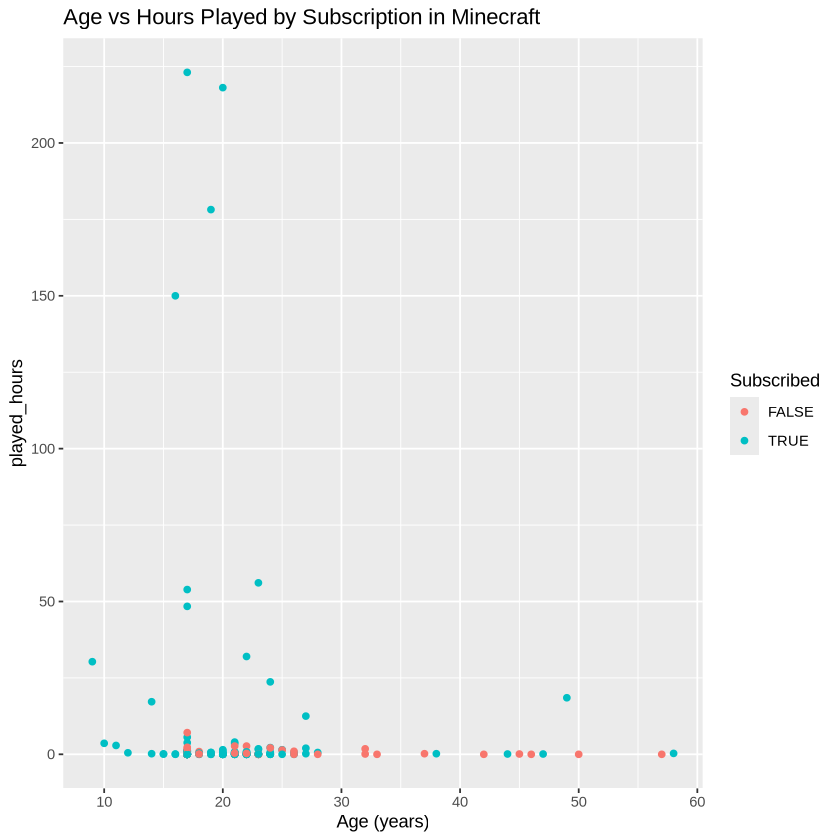

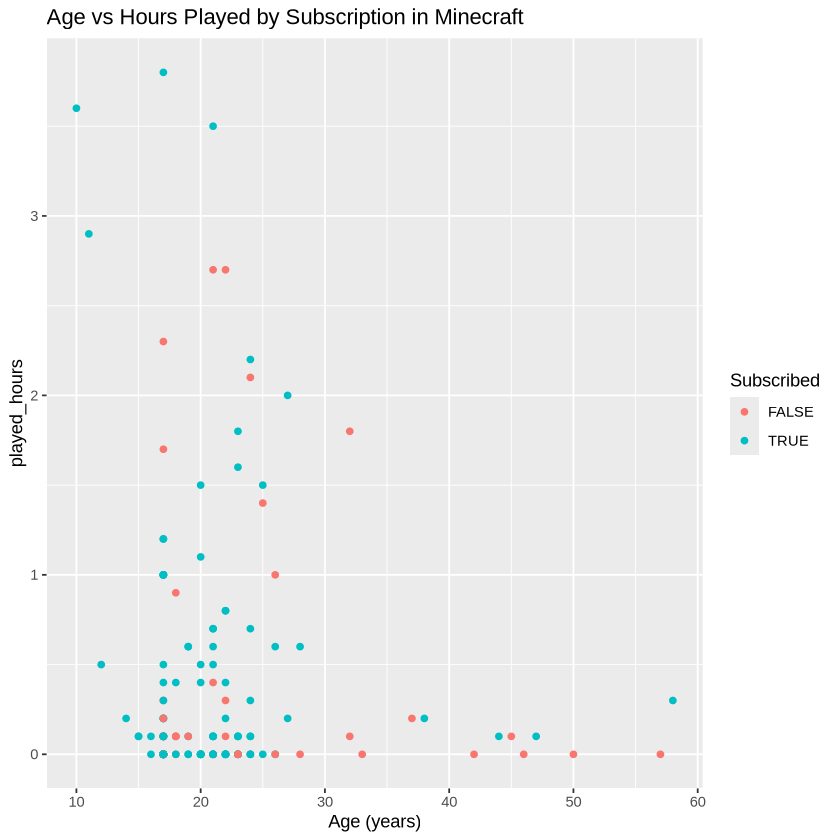

In [4]:
# Visualization 1: Age vs Hours Played Scatter Plot
ggplot(tidy_players, aes(x = Age, y = played_hours, color = subscribe)) +
       geom_point() + 
       labs(title = "Age vs Hours Played by Subscription in Minecraft", x = "Age (years)", "Hours Played", color = "Subscribed")
ggplot(filter(tidy_players, played_hours < 4), aes(x = Age, y = played_hours, color = subscribe)) +
       geom_point() + 
       labs(title = "Age vs Hours Played by Subscription in Minecraft", x = "Age (years)", "Hours Played", color = "Subscribed")

**Observations**  
Two visualizations were created because the few observations with hours played over 4 hours were making it hard to analyze the majority of the other observations.

A few observations from the two plots include:  
- All players with over 3 hours of playtime were subscribed
- Most players between the ages of 10 and 20 have higher playtime, and more are subscribed than not

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


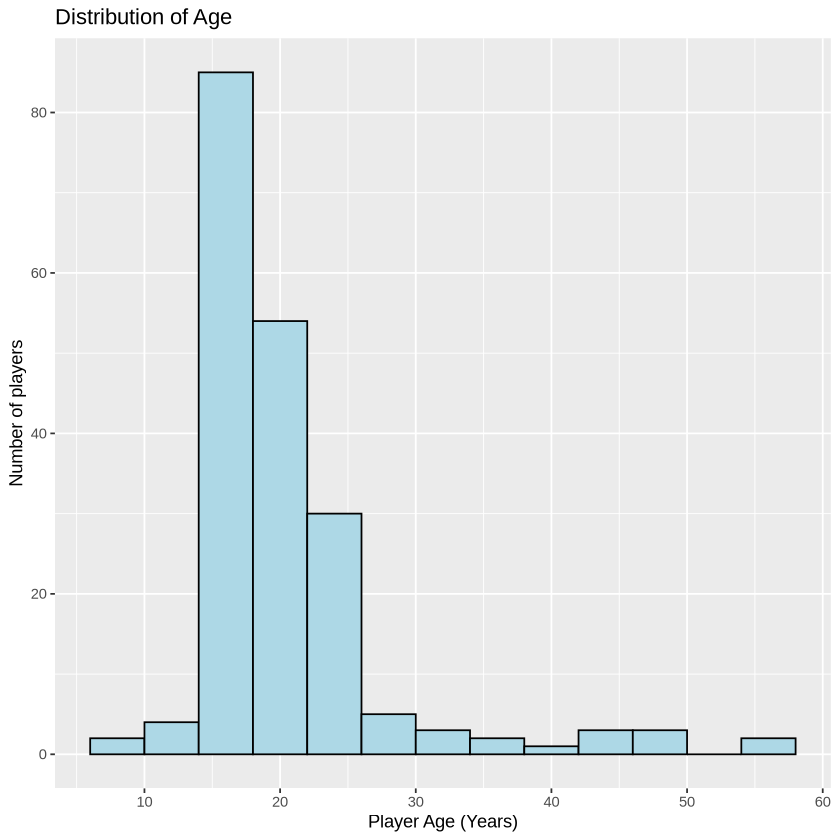

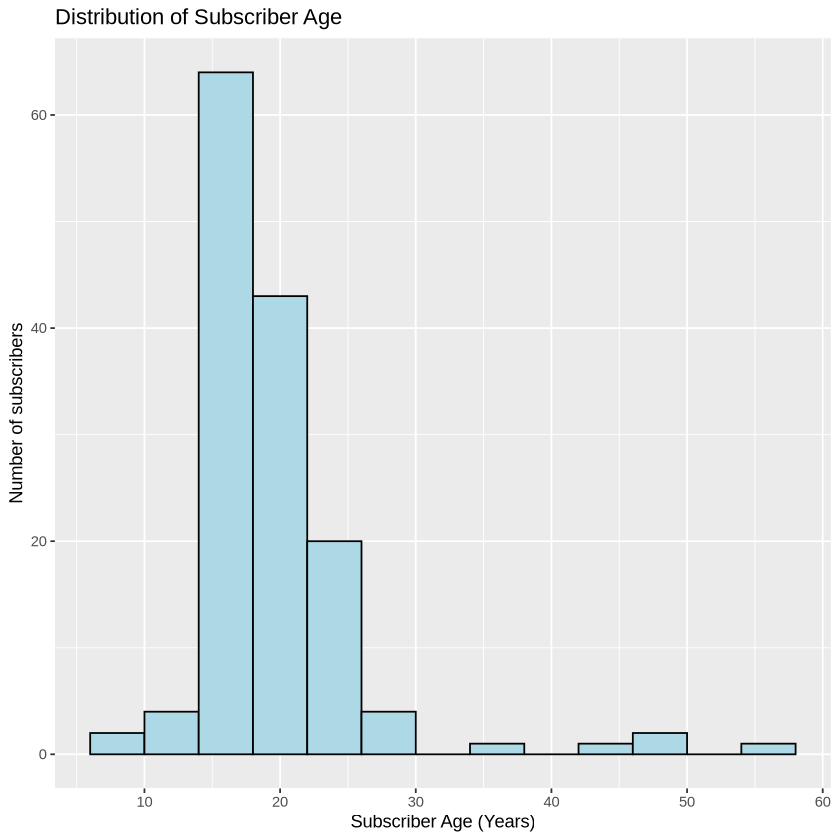

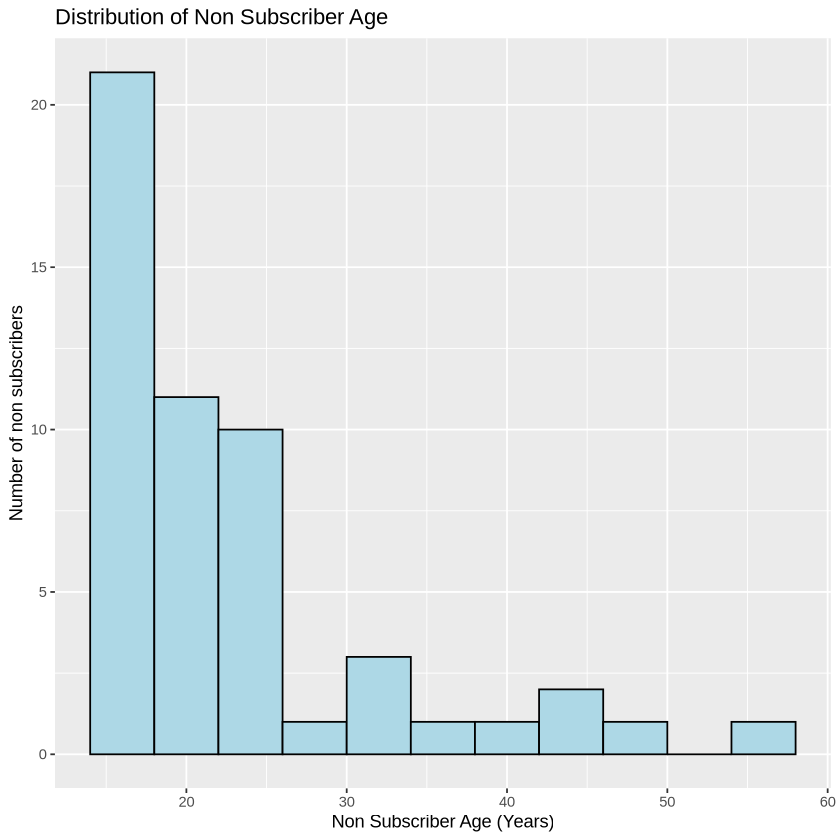

In [5]:
# Visualization 2: Age Histogram, Age Histogram of subscribed players and Age Histogram of not subscribed players
ggplot(tidy_players, aes(x = Age)) +
    geom_histogram(binwidth = 4, color = "black", fill = "lightblue") +
    labs(title = "Distribution of Age", x = "Player Age (Years)", y = "Number of players")
ggplot(filter(tidy_players, subscribe == "TRUE"), aes(x = Age)) +
    geom_histogram(binwidth = 4, color = "black", fill = "lightblue") +
    labs(title = "Distribution of Subscriber Age", x = "Subscriber Age (Years)", y = "Number of subscribers")
ggplot(filter(tidy_players, subscribe == "FALSE"), aes(x = Age)) +
    geom_histogram(binwidth = 4, color = "black", fill = "lightblue") +
    labs(title = "Distribution of Non Subscriber Age", x = "Non Subscriber Age (Years)", y = "Number of non subscribers")

**Observations**
Three histograms were created, the first one is to see the distribution of age throughout all the players, the second one is distribution of subscribers' age, and finally there is distribution of non subscribers' age.  
A few observations from the 3 histograms include:  
- The first and second histogram look very similar
- The third histogram shows a lower number of players then the other two
- There are more subscribers between the ages of 15 and 25
- There are most non subscribers between ages 0 and 10

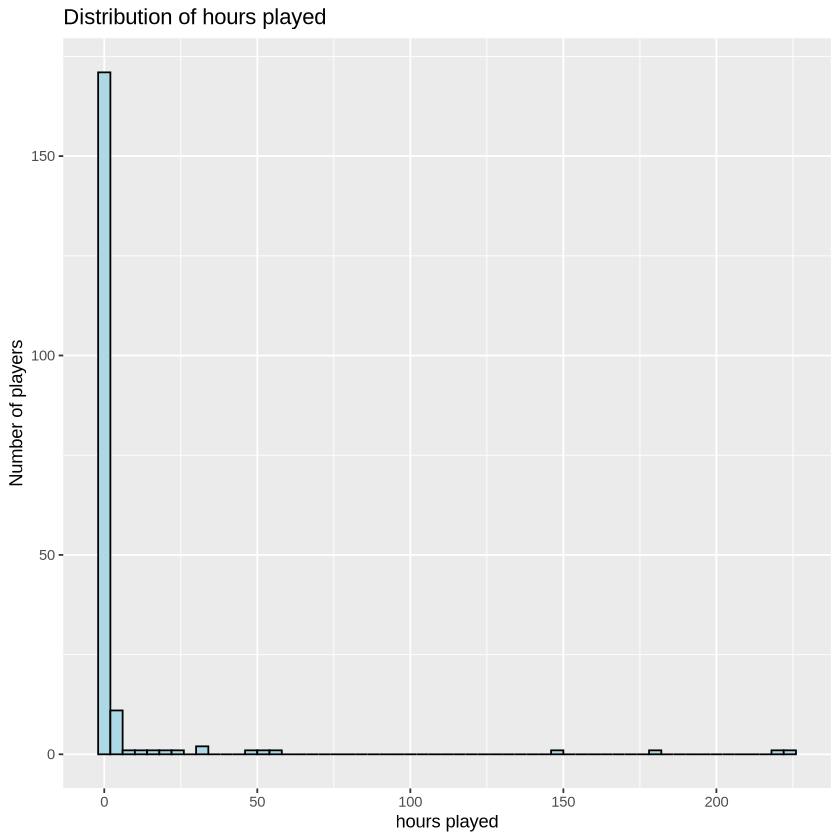

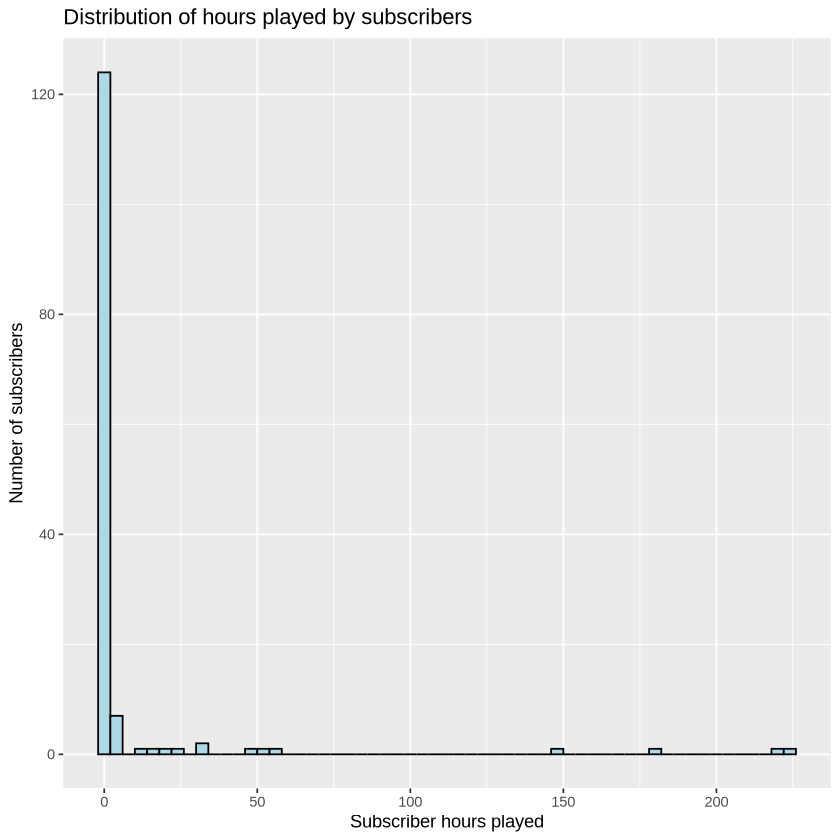

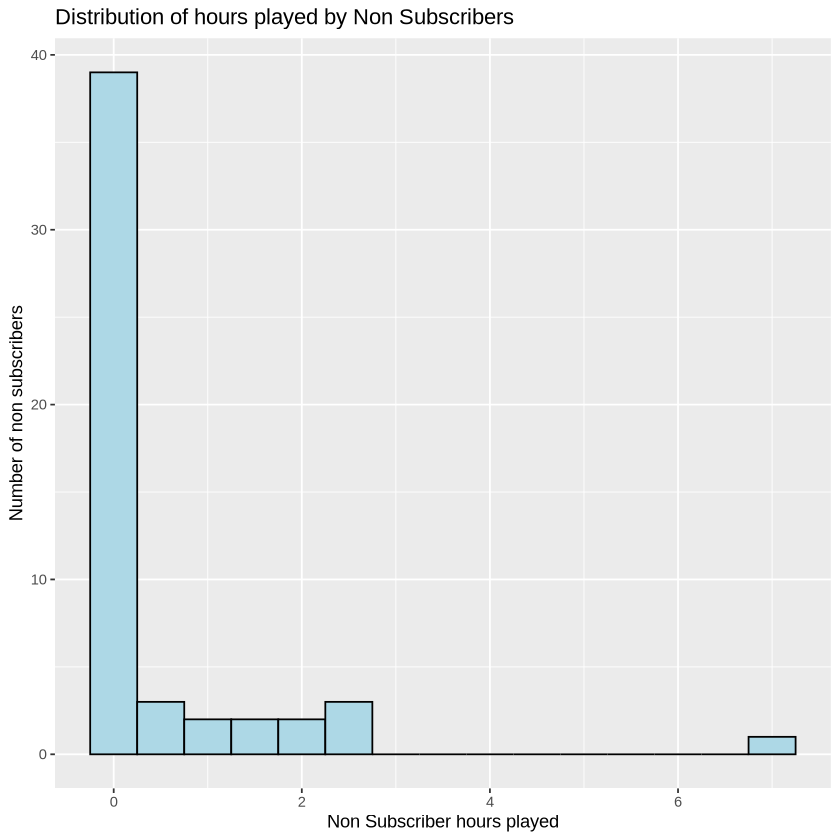

In [6]:
# Visualization 3: hours played Histogram, hours played Histogram of subscribed players and hours played Histogram of not subscribed players
ggplot(tidy_players, aes(x = played_hours)) +
    geom_histogram(binwidth = 4, color = "black", fill = "lightblue") +
    labs(title = "Distribution of hours played", x = "hours played", y = "Number of players")
ggplot(filter(tidy_players, subscribe == "TRUE"), aes(x = played_hours)) +
    geom_histogram(binwidth = 4, color = "black", fill = "lightblue") +
    labs(title = "Distribution of hours played by subscribers", x = "Subscriber hours played", y = "Number of subscribers")
ggplot(filter(tidy_players, subscribe == "FALSE"), aes(x = played_hours)) +
    geom_histogram(binwidth = 0.5, color = "black", fill = "lightblue") +
    labs(title = "Distribution of hours played by Non Subscribers", x = "Non Subscriber hours played", y = "Number of non subscribers")

**Observations**  
Three histograms were created, the first one is to see the distribution of hours played throughout all the players, the second one is distribution of subscribers' hours played, and finally there is distribution of non subscribers' hours played.  
A few observations from the 3 histograms include:  
- The first and second histogram look very similar
- The third histogram shows a lower number of players then the other two
- Most players throughout all 3 histograms seem to have 0 to around 1 hour played
- In the third histogram it is evident that subscribers can have a high amount of playtime (over 200 hours)
- The max playtime for non subscribers seems to be merely ~6.5 hours

**How the data will help answer the question**

The dataset contains the player information variables that we can explore to help answer our question. We will focus on **3 out of the 7** variables. The ***explanatory variables*** are `played_hours` and `age`, and the ***response variable*** is `subscribe`. These explanatory variables contain player demographic and usage information, which may influence their possibility of subscribing. The `experience`, `name`, `gender` and `hashedEmail` are irrelevant to our question. The data will need to be standardized before applying our model.

**The Plan**  
This report will use K-Nearest Neighbours (KNN) Classification model:
- because it is a binary classification
- Assumptions include:
  - standardized data
  - enough close observations
- Limitations/ Weaknesses include:
  - sensitive to scaling because it uses distance
  - may have issues with the outliers
- it will use multiple values of K and calculate accuracy to ensure correct selection
- Processing:
  - Split the data into training and testing
  - standardize data
  - use cross-validation

## GitHub Repository Link  
